# Load data 

#### First, we import some libraries

In [1]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans
# get interactions of features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# gradient boosting trees
from xgboost import XGBRegressor

# we use it to interact with the file system
import os
# compute time
from time import time

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# no warning
import warnings
warnings.filterwarnings("ignore")


from common import load_data, split_data

### Import data

In [2]:
data_dir = "../data/"
full_data = load_data(data_dir)

data = full_data["data"]
inputs_perf = full_data["performance_properties"]
inputs_feat = full_data["features"]
inputs_categ = full_data["features_categorical"]
inputs_num = full_data["features_numerical"]
inputs_feat_cols = full_data["feature_columns"]
inputs_prop = full_data["input_properties"]
inputs_name = full_data["input_names"]
inputs_count = full_data["input_counts"]

random_seed = 100
system = "gcc"
train_data, test_data, _ , _ = split_data(
    data, system, inputs_count, inputs_feat_cols, random_seed
)

np.random.seed(random_seed)

valid_training_percentages = [(k+1)/10 for k in range(9)] # 0.1 -> 0.9 included

train = dict()
val = dict()

for dkey in data.keys():
    soft, input_id = dkey
    for p in valid_training_percentages:
        df = data[soft, input_id]
        for perf in inputs_perf[soft]:
            df[perf] = (df[perf]-np.mean(df[perf]))/np.std(df[perf])
        X_train, X_test = train_test_split(df, train_size=p)
        train[soft, input_id, p] = X_train
        val[soft, input_id, p] = X_test

### Compare supervised learning full online and the average baseline

In [3]:
name_systems = ["nodejs", "poppler", "xz", "x264", "gcc", "lingeling", "sqlite", "imagemagick"]

mae_rf = dict()

for ns in name_systems:
    for perf in inputs_perf[ns]:
        other_perf = [perf for perf in inputs_perf[ns]]
        other_perf.remove(perf)
        for pct in valid_training_percentages:
            for index_input in range(inputs_count[ns]):
                
                try:
                    X_train = train[ns, index_input, pct].drop(other_perf, axis = 1).drop([perf], axis = 1)
                    y_train = train[ns, index_input, pct][perf]

                    clf = XGBRegressor()
                    clf.fit(X_train, y_train)

                    X_val = val[ns, index_input, pct].drop(other_perf, axis = 1).drop([perf], axis = 1)
                    y_val = val[ns, index_input, pct][perf]
                    y_rf = clf.predict(X_val)

                    mae_rf[ns, perf, pct, index_input] = mean_absolute_error(y_rf, y_val)
                except:
                    print(ns, perf, pct, index_input)

nodejs ops 0.1 517
nodejs ops 0.2 517
nodejs ops 0.3 517
nodejs ops 0.4 517
nodejs ops 0.5 517
nodejs ops 0.6 517
nodejs ops 0.7 517
nodejs ops 0.8 517
nodejs ops 0.9 517
poppler size 0.1 0
poppler size 0.1 1
poppler size 0.1 5
poppler size 0.1 8
poppler size 0.1 19
poppler size 0.1 25
poppler size 0.1 28
poppler size 0.1 31
poppler size 0.1 37
poppler size 0.1 41
poppler size 0.1 44
poppler size 0.1 45
poppler size 0.1 47
poppler size 0.1 52
poppler size 0.1 55
poppler size 0.1 57
poppler size 0.1 60
poppler size 0.1 63
poppler size 0.1 65
poppler size 0.1 67
poppler size 0.1 68
poppler size 0.1 69
poppler size 0.1 72
poppler size 0.1 74
poppler size 0.1 77
poppler size 0.1 79
poppler size 0.1 80
poppler size 0.1 82
poppler size 0.1 84
poppler size 0.1 93
poppler size 0.1 96
poppler size 0.1 97
poppler size 0.1 99
poppler size 0.1 100
poppler size 0.1 102
poppler size 0.1 103
poppler size 0.1 104
poppler size 0.1 108
poppler size 0.1 113
poppler size 0.1 120
poppler size 0.1 128
poppl

poppler size 0.1 1280
poppler size 0.1 1284
poppler size 0.1 1294
poppler size 0.1 1295
poppler size 0.1 1299
poppler size 0.1 1310
poppler size 0.1 1313
poppler size 0.1 1318
poppler size 0.1 1319
poppler size 0.1 1320
poppler size 0.1 1322
poppler size 0.1 1323
poppler size 0.1 1328
poppler size 0.1 1331
poppler size 0.1 1336
poppler size 0.1 1338
poppler size 0.1 1339
poppler size 0.1 1341
poppler size 0.1 1345
poppler size 0.1 1350
poppler size 0.1 1360
poppler size 0.1 1365
poppler size 0.1 1370
poppler size 0.1 1371
poppler size 0.1 1373
poppler size 0.1 1387
poppler size 0.1 1390
poppler size 0.1 1391
poppler size 0.1 1393
poppler size 0.1 1397
poppler size 0.1 1398
poppler size 0.1 1401
poppler size 0.1 1402
poppler size 0.1 1404
poppler size 0.1 1409
poppler size 0.1 1416
poppler size 0.1 1421
poppler size 0.1 1422
poppler size 0.1 1423
poppler size 0.1 1425
poppler size 0.1 1426
poppler size 0.1 1428
poppler size 0.1 1430
poppler size 0.1 1432
poppler size 0.1 1437
poppler si

poppler size 0.2 1125
poppler size 0.2 1126
poppler size 0.2 1127
poppler size 0.2 1132
poppler size 0.2 1133
poppler size 0.2 1141
poppler size 0.2 1143
poppler size 0.2 1145
poppler size 0.2 1151
poppler size 0.2 1154
poppler size 0.2 1160
poppler size 0.2 1163
poppler size 0.2 1166
poppler size 0.2 1169
poppler size 0.2 1174
poppler size 0.2 1177
poppler size 0.2 1179
poppler size 0.2 1180
poppler size 0.2 1185
poppler size 0.2 1188
poppler size 0.2 1190
poppler size 0.2 1193
poppler size 0.2 1194
poppler size 0.2 1198
poppler size 0.2 1201
poppler size 0.2 1207
poppler size 0.2 1218
poppler size 0.2 1222
poppler size 0.2 1225
poppler size 0.2 1228
poppler size 0.2 1230
poppler size 0.2 1235
poppler size 0.2 1237
poppler size 0.2 1239
poppler size 0.2 1240
poppler size 0.2 1241
poppler size 0.2 1242
poppler size 0.2 1249
poppler size 0.2 1252
poppler size 0.2 1253
poppler size 0.2 1254
poppler size 0.2 1260
poppler size 0.2 1265
poppler size 0.2 1270
poppler size 0.2 1271
poppler si

poppler size 0.3 955
poppler size 0.3 960
poppler size 0.3 966
poppler size 0.3 974
poppler size 0.3 976
poppler size 0.3 979
poppler size 0.3 982
poppler size 0.3 983
poppler size 0.3 984
poppler size 0.3 985
poppler size 0.3 986
poppler size 0.3 988
poppler size 0.3 990
poppler size 0.3 991
poppler size 0.3 992
poppler size 0.3 993
poppler size 0.3 995
poppler size 0.3 1000
poppler size 0.3 1001
poppler size 0.3 1007
poppler size 0.3 1012
poppler size 0.3 1016
poppler size 0.3 1017
poppler size 0.3 1019
poppler size 0.3 1020
poppler size 0.3 1023
poppler size 0.3 1031
poppler size 0.3 1033
poppler size 0.3 1037
poppler size 0.3 1039
poppler size 0.3 1050
poppler size 0.3 1051
poppler size 0.3 1060
poppler size 0.3 1063
poppler size 0.3 1064
poppler size 0.3 1066
poppler size 0.3 1068
poppler size 0.3 1070
poppler size 0.3 1071
poppler size 0.3 1078
poppler size 0.3 1081
poppler size 0.3 1085
poppler size 0.3 1090
poppler size 0.3 1091
poppler size 0.3 1095
poppler size 0.3 1101
poppl

poppler size 0.4 781
poppler size 0.4 783
poppler size 0.4 791
poppler size 0.4 792
poppler size 0.4 793
poppler size 0.4 799
poppler size 0.4 802
poppler size 0.4 805
poppler size 0.4 809
poppler size 0.4 814
poppler size 0.4 818
poppler size 0.4 822
poppler size 0.4 823
poppler size 0.4 824
poppler size 0.4 825
poppler size 0.4 828
poppler size 0.4 830
poppler size 0.4 832
poppler size 0.4 833
poppler size 0.4 849
poppler size 0.4 851
poppler size 0.4 855
poppler size 0.4 857
poppler size 0.4 860
poppler size 0.4 861
poppler size 0.4 862
poppler size 0.4 867
poppler size 0.4 875
poppler size 0.4 876
poppler size 0.4 877
poppler size 0.4 888
poppler size 0.4 891
poppler size 0.4 892
poppler size 0.4 894
poppler size 0.4 896
poppler size 0.4 899
poppler size 0.4 904
poppler size 0.4 905
poppler size 0.4 914
poppler size 0.4 916
poppler size 0.4 921
poppler size 0.4 925
poppler size 0.4 932
poppler size 0.4 936
poppler size 0.4 939
poppler size 0.4 940
poppler size 0.4 941
poppler size 

poppler size 0.5 612
poppler size 0.5 613
poppler size 0.5 616
poppler size 0.5 618
poppler size 0.5 619
poppler size 0.5 620
poppler size 0.5 622
poppler size 0.5 623
poppler size 0.5 624
poppler size 0.5 626
poppler size 0.5 631
poppler size 0.5 634
poppler size 0.5 637
poppler size 0.5 640
poppler size 0.5 644
poppler size 0.5 654
poppler size 0.5 657
poppler size 0.5 659
poppler size 0.5 660
poppler size 0.5 661
poppler size 0.5 662
poppler size 0.5 663
poppler size 0.5 670
poppler size 0.5 681
poppler size 0.5 682
poppler size 0.5 686
poppler size 0.5 687
poppler size 0.5 688
poppler size 0.5 689
poppler size 0.5 693
poppler size 0.5 699
poppler size 0.5 700
poppler size 0.5 706
poppler size 0.5 711
poppler size 0.5 712
poppler size 0.5 713
poppler size 0.5 715
poppler size 0.5 718
poppler size 0.5 720
poppler size 0.5 721
poppler size 0.5 726
poppler size 0.5 733
poppler size 0.5 743
poppler size 0.5 752
poppler size 0.5 761
poppler size 0.5 768
poppler size 0.5 769
poppler size 

poppler size 0.6 433
poppler size 0.6 439
poppler size 0.6 440
poppler size 0.6 441
poppler size 0.6 443
poppler size 0.6 444
poppler size 0.6 447
poppler size 0.6 449
poppler size 0.6 454
poppler size 0.6 460
poppler size 0.6 469
poppler size 0.6 475
poppler size 0.6 477
poppler size 0.6 484
poppler size 0.6 486
poppler size 0.6 487
poppler size 0.6 488
poppler size 0.6 491
poppler size 0.6 494
poppler size 0.6 496
poppler size 0.6 502
poppler size 0.6 504
poppler size 0.6 508
poppler size 0.6 510
poppler size 0.6 511
poppler size 0.6 515
poppler size 0.6 516
poppler size 0.6 524
poppler size 0.6 526
poppler size 0.6 534
poppler size 0.6 539
poppler size 0.6 540
poppler size 0.6 541
poppler size 0.6 543
poppler size 0.6 549
poppler size 0.6 556
poppler size 0.6 564
poppler size 0.6 566
poppler size 0.6 569
poppler size 0.6 571
poppler size 0.6 577
poppler size 0.6 579
poppler size 0.6 581
poppler size 0.6 585
poppler size 0.6 587
poppler size 0.6 588
poppler size 0.6 590
poppler size 

poppler size 0.7 303
poppler size 0.7 304
poppler size 0.7 306
poppler size 0.7 310
poppler size 0.7 314
poppler size 0.7 316
poppler size 0.7 317
poppler size 0.7 322
poppler size 0.7 323
poppler size 0.7 324
poppler size 0.7 325
poppler size 0.7 328
poppler size 0.7 331
poppler size 0.7 333
poppler size 0.7 337
poppler size 0.7 342
poppler size 0.7 344
poppler size 0.7 348
poppler size 0.7 349
poppler size 0.7 350
poppler size 0.7 356
poppler size 0.7 358
poppler size 0.7 359
poppler size 0.7 366
poppler size 0.7 367
poppler size 0.7 368
poppler size 0.7 370
poppler size 0.7 377
poppler size 0.7 380
poppler size 0.7 382
poppler size 0.7 383
poppler size 0.7 385
poppler size 0.7 388
poppler size 0.7 389
poppler size 0.7 391
poppler size 0.7 394
poppler size 0.7 395
poppler size 0.7 396
poppler size 0.7 398
poppler size 0.7 401
poppler size 0.7 403
poppler size 0.7 405
poppler size 0.7 406
poppler size 0.7 409
poppler size 0.7 410
poppler size 0.7 411
poppler size 0.7 426
poppler size 

poppler size 0.8 108
poppler size 0.8 113
poppler size 0.8 120
poppler size 0.8 128
poppler size 0.8 135
poppler size 0.8 137
poppler size 0.8 138
poppler size 0.8 150
poppler size 0.8 151
poppler size 0.8 152
poppler size 0.8 154
poppler size 0.8 155
poppler size 0.8 159
poppler size 0.8 170
poppler size 0.8 173
poppler size 0.8 175
poppler size 0.8 178
poppler size 0.8 181
poppler size 0.8 187
poppler size 0.8 189
poppler size 0.8 190
poppler size 0.8 194
poppler size 0.8 197
poppler size 0.8 203
poppler size 0.8 208
poppler size 0.8 210
poppler size 0.8 211
poppler size 0.8 214
poppler size 0.8 217
poppler size 0.8 219
poppler size 0.8 222
poppler size 0.8 229
poppler size 0.8 234
poppler size 0.8 235
poppler size 0.8 243
poppler size 0.8 245
poppler size 0.8 248
poppler size 0.8 251
poppler size 0.8 254
poppler size 0.8 255
poppler size 0.8 257
poppler size 0.8 259
poppler size 0.8 260
poppler size 0.8 268
poppler size 0.8 270
poppler size 0.8 271
poppler size 0.8 280
poppler size 

poppler size 0.8 1444
poppler size 0.8 1445
poppler size 0.8 1447
poppler size 0.8 1451
poppler size 0.8 1461
poppler size 0.8 1462
poppler size 0.8 1468
poppler size 0.8 1472
poppler size 0.8 1473
poppler size 0.8 1475
poppler size 0.9 0
poppler size 0.9 1
poppler size 0.9 5
poppler size 0.9 8
poppler size 0.9 19
poppler size 0.9 25
poppler size 0.9 28
poppler size 0.9 31
poppler size 0.9 37
poppler size 0.9 41
poppler size 0.9 44
poppler size 0.9 45
poppler size 0.9 47
poppler size 0.9 52
poppler size 0.9 55
poppler size 0.9 57
poppler size 0.9 60
poppler size 0.9 63
poppler size 0.9 65
poppler size 0.9 67
poppler size 0.9 68
poppler size 0.9 69
poppler size 0.9 72
poppler size 0.9 74
poppler size 0.9 77
poppler size 0.9 79
poppler size 0.9 80
poppler size 0.9 82
poppler size 0.9 84
poppler size 0.9 93
poppler size 0.9 96
poppler size 0.9 97
poppler size 0.9 99
poppler size 0.9 100
poppler size 0.9 102
poppler size 0.9 103
poppler size 0.9 104
poppler size 0.9 108
poppler size 0.9 11

poppler size 0.9 1280
poppler size 0.9 1284
poppler size 0.9 1294
poppler size 0.9 1295
poppler size 0.9 1299
poppler size 0.9 1310
poppler size 0.9 1313
poppler size 0.9 1318
poppler size 0.9 1319
poppler size 0.9 1320
poppler size 0.9 1322
poppler size 0.9 1323
poppler size 0.9 1328
poppler size 0.9 1331
poppler size 0.9 1336
poppler size 0.9 1338
poppler size 0.9 1339
poppler size 0.9 1341
poppler size 0.9 1345
poppler size 0.9 1350
poppler size 0.9 1360
poppler size 0.9 1365
poppler size 0.9 1370
poppler size 0.9 1371
poppler size 0.9 1373
poppler size 0.9 1387
poppler size 0.9 1390
poppler size 0.9 1391
poppler size 0.9 1393
poppler size 0.9 1397
poppler size 0.9 1398
poppler size 0.9 1401
poppler size 0.9 1402
poppler size 0.9 1404
poppler size 0.9 1409
poppler size 0.9 1416
poppler size 0.9 1421
poppler size 0.9 1422
poppler size 0.9 1423
poppler size 0.9 1425
poppler size 0.9 1426
poppler size 0.9 1428
poppler size 0.9 1430
poppler size 0.9 1432
poppler size 0.9 1437
poppler si

lingeling conflicts 0.5 52
lingeling conflicts 0.5 53
lingeling conflicts 0.5 59
lingeling conflicts 0.5 64
lingeling conflicts 0.5 65
lingeling conflicts 0.5 66
lingeling conflicts 0.5 67
lingeling conflicts 0.5 68
lingeling conflicts 0.5 71
lingeling conflicts 0.5 75
lingeling conflicts 0.5 76
lingeling conflicts 0.5 77
lingeling conflicts 0.5 79
lingeling conflicts 0.5 80
lingeling conflicts 0.5 112
lingeling conflicts 0.5 253
lingeling conflicts 0.6 1
lingeling conflicts 0.6 2
lingeling conflicts 0.6 4
lingeling conflicts 0.6 5
lingeling conflicts 0.6 6
lingeling conflicts 0.6 7
lingeling conflicts 0.6 8
lingeling conflicts 0.6 9
lingeling conflicts 0.6 10
lingeling conflicts 0.6 11
lingeling conflicts 0.6 12
lingeling conflicts 0.6 13
lingeling conflicts 0.6 14
lingeling conflicts 0.6 15
lingeling conflicts 0.6 16
lingeling conflicts 0.6 17
lingeling conflicts 0.6 18
lingeling conflicts 0.6 19
lingeling conflicts 0.6 20
lingeling conflicts 0.6 21
lingeling conflicts 0.6 22
lingeli

lingeling cps 0.2 59
lingeling cps 0.2 64
lingeling cps 0.2 65
lingeling cps 0.2 66
lingeling cps 0.2 67
lingeling cps 0.2 68
lingeling cps 0.2 71
lingeling cps 0.2 75
lingeling cps 0.2 76
lingeling cps 0.2 77
lingeling cps 0.2 79
lingeling cps 0.2 80
lingeling cps 0.2 112
lingeling cps 0.2 253
lingeling cps 0.3 1
lingeling cps 0.3 2
lingeling cps 0.3 4
lingeling cps 0.3 5
lingeling cps 0.3 6
lingeling cps 0.3 7
lingeling cps 0.3 8
lingeling cps 0.3 9
lingeling cps 0.3 10
lingeling cps 0.3 11
lingeling cps 0.3 12
lingeling cps 0.3 13
lingeling cps 0.3 14
lingeling cps 0.3 15
lingeling cps 0.3 16
lingeling cps 0.3 17
lingeling cps 0.3 18
lingeling cps 0.3 19
lingeling cps 0.3 20
lingeling cps 0.3 21
lingeling cps 0.3 22
lingeling cps 0.3 23
lingeling cps 0.3 24
lingeling cps 0.3 25
lingeling cps 0.3 26
lingeling cps 0.3 27
lingeling cps 0.3 28
lingeling cps 0.3 29
lingeling cps 0.3 30
lingeling cps 0.3 32
lingeling cps 0.3 34
lingeling cps 0.3 35
lingeling cps 0.3 36
lingeling cps 0.3 3

lingeling cps 0.9 75
lingeling cps 0.9 76
lingeling cps 0.9 77
lingeling cps 0.9 79
lingeling cps 0.9 80
lingeling cps 0.9 112
lingeling cps 0.9 253
lingeling reductions 0.1 0
lingeling reductions 0.1 1
lingeling reductions 0.1 2
lingeling reductions 0.1 4
lingeling reductions 0.1 5
lingeling reductions 0.1 6
lingeling reductions 0.1 7
lingeling reductions 0.1 8
lingeling reductions 0.1 9
lingeling reductions 0.1 10
lingeling reductions 0.1 11
lingeling reductions 0.1 12
lingeling reductions 0.1 13
lingeling reductions 0.1 14
lingeling reductions 0.1 15
lingeling reductions 0.1 16
lingeling reductions 0.1 17
lingeling reductions 0.1 18
lingeling reductions 0.1 19
lingeling reductions 0.1 20
lingeling reductions 0.1 21
lingeling reductions 0.1 22
lingeling reductions 0.1 23
lingeling reductions 0.1 24
lingeling reductions 0.1 25
lingeling reductions 0.1 26
lingeling reductions 0.1 27
lingeling reductions 0.1 28
lingeling reductions 0.1 29
lingeling reductions 0.1 30
lingeling reductions

lingeling reductions 0.4 28
lingeling reductions 0.4 29
lingeling reductions 0.4 30
lingeling reductions 0.4 31
lingeling reductions 0.4 32
lingeling reductions 0.4 33
lingeling reductions 0.4 34
lingeling reductions 0.4 35
lingeling reductions 0.4 36
lingeling reductions 0.4 37
lingeling reductions 0.4 38
lingeling reductions 0.4 39
lingeling reductions 0.4 40
lingeling reductions 0.4 41
lingeling reductions 0.4 42
lingeling reductions 0.4 43
lingeling reductions 0.4 51
lingeling reductions 0.4 52
lingeling reductions 0.4 53
lingeling reductions 0.4 57
lingeling reductions 0.4 59
lingeling reductions 0.4 61
lingeling reductions 0.4 62
lingeling reductions 0.4 63
lingeling reductions 0.4 64
lingeling reductions 0.4 65
lingeling reductions 0.4 66
lingeling reductions 0.4 67
lingeling reductions 0.4 68
lingeling reductions 0.4 70
lingeling reductions 0.4 71
lingeling reductions 0.4 72
lingeling reductions 0.4 74
lingeling reductions 0.4 75
lingeling reductions 0.4 76
lingeling reductions

lingeling reductions 0.7 76
lingeling reductions 0.7 77
lingeling reductions 0.7 78
lingeling reductions 0.7 79
lingeling reductions 0.7 80
lingeling reductions 0.7 101
lingeling reductions 0.7 102
lingeling reductions 0.7 107
lingeling reductions 0.7 112
lingeling reductions 0.7 113
lingeling reductions 0.7 115
lingeling reductions 0.7 117
lingeling reductions 0.7 118
lingeling reductions 0.7 123
lingeling reductions 0.7 126
lingeling reductions 0.7 127
lingeling reductions 0.7 128
lingeling reductions 0.7 129
lingeling reductions 0.7 130
lingeling reductions 0.7 131
lingeling reductions 0.7 149
lingeling reductions 0.7 253
lingeling reductions 0.7 276
lingeling reductions 0.7 292
lingeling reductions 0.7 297
lingeling reductions 0.7 308
lingeling reductions 0.7 311
lingeling reductions 0.8 0
lingeling reductions 0.8 1
lingeling reductions 0.8 2
lingeling reductions 0.8 4
lingeling reductions 0.8 5
lingeling reductions 0.8 6
lingeling reductions 0.8 7
lingeling reductions 0.8 8
lingel

In [4]:
rq1_lines = []

for rl in mae_rf.keys():
    ns, perf, pct, index_input = rl
    rq1_lines.append((ns, perf, pct, index_input, "Tree", mae_rf[rl]))

final_rq1 = pd.DataFrame(rq1_lines, columns = ["soft", "perf", "budget", "input", "Approach", "val"])

In [5]:
final_rq1.to_csv('../results/RQ1_data_mae.csv')

In [6]:
res_rq3 = pd.read_csv("../results/RQ3_data.csv").set_index("Unnamed: 0")
tab_offline = res_rq3.groupby(["nb_config"]).median()['mae']

In [7]:
tab_online = final_rq1.groupby(["budget"]).median()['val']

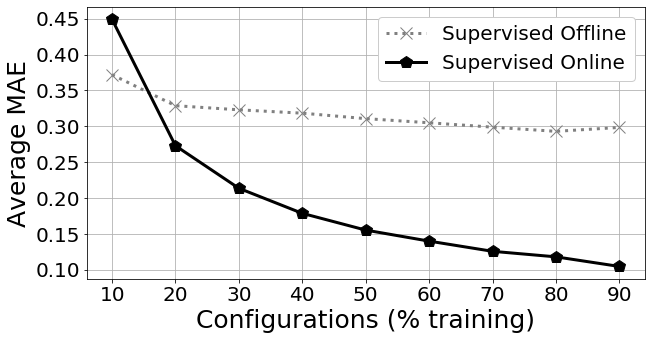

In [8]:
fig = plt.figure(figsize = (10, 5))
axs =fig.add_subplot(111)

linestyles = ['dotted', 'solid']
colors = ["gray", "black"]
markers = ['x', 'p', 's', 'x']

axs.plot([0.1*k for k in range(1,10)], tab_offline, linewidth=3, linestyle = linestyles[0], c= colors[0],
                            marker = markers[0], markersize = 12, label="Supervised Offline", color=colors[0])
axs.plot([0.1*k for k in range(1,10)], tab_online, linewidth=3, linestyle = linestyles[1], c= colors[1],
                            marker = markers[1], markersize = 12, label="Supervised Online")
axs.set_title("", fontsize =15)
axs.grid(axis="both")
axs.legend(fontsize=20, loc = 'upper middle', framealpha=1)
axs.set_xlabel("Configurations (% training)", size = 25)
axs.set_ylabel("MAE", size = 25)
axs.set_xticklabels([10*k for k in range(0, 10)])

# Arrow
#plt.arrow(x = 0.65, y = 9, dx= 0, dy = -3, head_width = 0.02, head_length = .5, 
#          color="black", linewidth = 3, zorder = 5)
#plt.text(s = "Negative Transfer", x = 0.52, y = 9.3, 
#         size = 20, color = 'black', zorder = 5)

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig("../results/RQ4_eval_2.png", bbox_inches='tight', dpi =300)
plt.show()

In [9]:
tab_online

budget
0.1    0.449221
0.2    0.272870
0.3    0.213535
0.4    0.178560
0.5    0.155194
0.6    0.139805
0.7    0.125586
0.8    0.117869
0.9    0.104471
Name: val, dtype: float64